In [107]:
# imports
import pickle
import pandas as pd
import numpy as np

In [108]:
path = r"C:\Users\User\OneDrive\Desktop\Documents\06 Education\06 LHL\projects\drug-testing-project\data_files"
file = r"\df-2023-01-05.pkl"
df = pickle.load(open(path + file, 'rb'))

# Extract year, month, day

df.insert(loc = 1, column = 'YEAR', value = df['VISIT DATE'].dt.year)
df.insert(loc = 2, column = 'MONTH', value = df['VISIT DATE'].dt.month)
df.insert(loc = 3, column = 'DAY', value= df['VISIT DATE'].dt.dayofweek)

# Extract number of drugs detected per sample

df['NUM DRUGS'] = df.iloc[:,-6:].count(axis='columns')

# Does Expected Drug match actual drug? True = 1; False = 0

df['MATCH'] = df['EXPECTED  DRUG'] == df['FTIR SPECTROMETER 0']
df = df.replace({'MATCH' : {True:1,False:0}})

# pickle the engineered dataframe
file = open((path + r"\df-2023-01-05-features.pkl"),'wb')
pickle.dump(df, file)
file.close()

In [109]:
df.to_csv(path + r"\df-2023-01-05-features.csv")

In [105]:
df.head(10)

,VISIT DATE,YEAR,MONTH,DAY,CITY,SITE,EXPECTED DRUG,CATEGORY,COLOUR,TEXTURE,FENTANYL STRIP,BENZO STRIP,FTIR SPECTROMETER 0,FTIR SPECTROMETER 1,FTIR SPECTROMETER 2,FTIR SPECTROMETER 3,FTIR SPECTROMETER 4,FTIR SPECTROMETER 5,NUM DRUGS,MATCH
0,2022-12-31,2022,12,5,Vancouver,Get Your Drugs Tested,Ketamine,Psychedelic,White,Crystal,-1,0,Ketamine,Uncertain match,None,None,None,None,2,1
1,2022-12-31,2022,12,5,Vancouver,Get Your Drugs Tested,Ketamine,Psychedelic,White,Crystal,-1,0,Ketamine,Uncertain match,None,None,None,None,2,1
2,2022-12-31,2022,12,5,Vancouver,Get Your Drugs Tested,Cocaine,Stimulant,White,Granules,-1,0,Cocaine hcl,None,None,None,None,None,1,0
3,2022-12-31,2022,12,5,Vancouver,Get Your Drugs Tested,MDMA,Psychedelic,Brown (light),Powder,-1,0,Mdma,None,None,None,None,None,1,0
4,2022-12-31,2022,12,5,Vancouver,Get Your Drugs Tested,MDMA,Psychedelic,Pink (light),Crystal,-1,0,Mdma,None,None,None,None,None,1,0
5,2022-12-31,2022,12,5,Vancouver,Get Your Drugs Tested,Oxycodone,Opioid,White,Chunk,-1,-1,Uncertain match,Uncertain mineral,Uncertain carbohydrate,Oxycodone,Uncertain oil,Dicalcium phosphate,6,0
6,2022-12-31,2022,12,5,Vancouver,Get Your Drugs Tested,LSD,Psychedelic,White,Blotter paper (tab),-1,0,NaN,None,None,None,None,None,0,0
7,2022-12-31,2022,12,5,Nelson,ANKORS (Nelson),MDA,Psychedelic,White,Pressed tablet,-1,0,Mda,Uncertain oil,Microcrystalline cellulose,None,None,None,3,0
8,2022-12-31,2022,12,5,Vancouver,Get Your Drugs Tested,Heroin,Opioid,Brown,Granules,-1,-1,Heroin hcl,Caffeine,Sucrose,None,None,None,3,0
9,2022-12-31,2022,12,5,Vancouver,Get Your Drugs Tested,Ketamine,Psychedelic,Colourless,Crystal,-1,0,Ketamine,Dimethyl sulfone,None,None,None,None,2,1


In [ ]:
annual_mean = int(df.groupby('YEAR')['VISIT DATE'].count().mean())
print(f'Average number of visits per year: {annual_mean}')

monthly_mean = int(df.groupby(['YEAR','MONTH'])['VISIT DATE'].count().mean())
print(f'Average number of visits per month: {monthly_mean}')

daily_mean = int(df.groupby(['YEAR','MONTH','DAY'])['VISIT DATE'].count().mean())
print(f'Average number of visits per day: {daily_mean}')

Average number of visits per year: 12008
Average number of visits per month: 1091
Average number of visits per day: 167


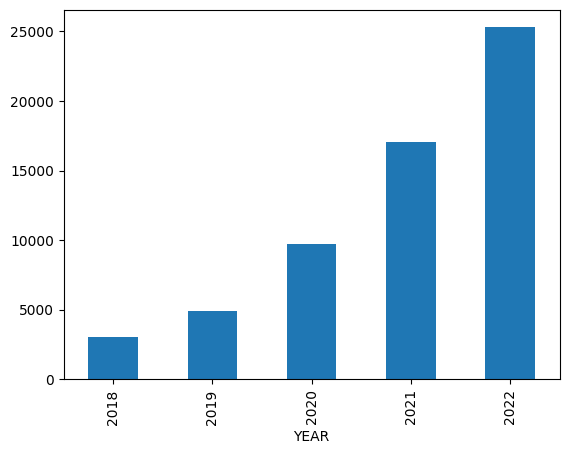

In [52]:
df_yearly_vists = df.groupby('YEAR')['VISIT DATE'].count().plot(kind='bar')

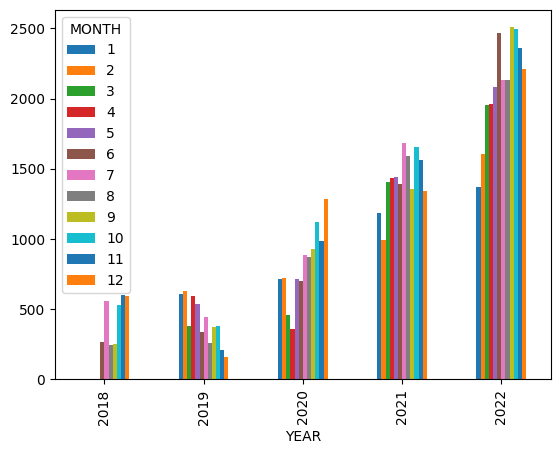

In [50]:
df_monthly_vists = df.groupby(['YEAR','MONTH'])['VISIT DATE'].count().unstack().plot(kind='bar')

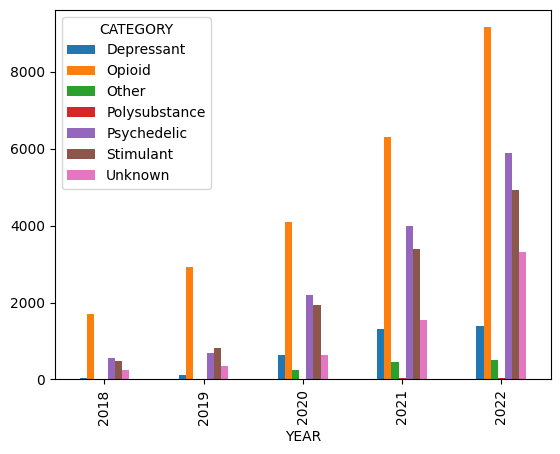

In [49]:
df_cat_year = df.groupby(['YEAR','CATEGORY'])['VISIT DATE'].count().unstack().plot(kind='bar')

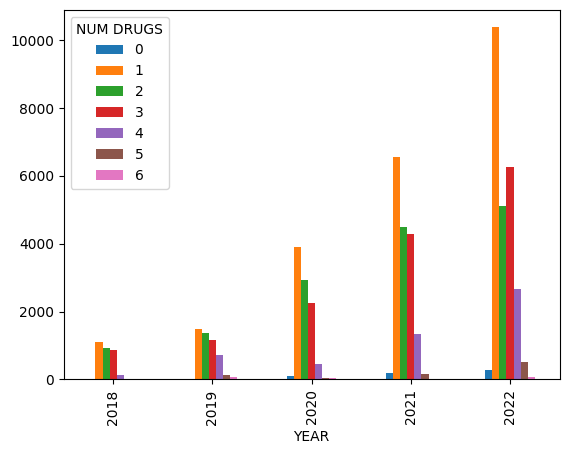

In [58]:
df_monthly_vists = df.groupby(['YEAR','NUM DRUGS'])['VISIT DATE'].count().unstack().plot(kind='bar')

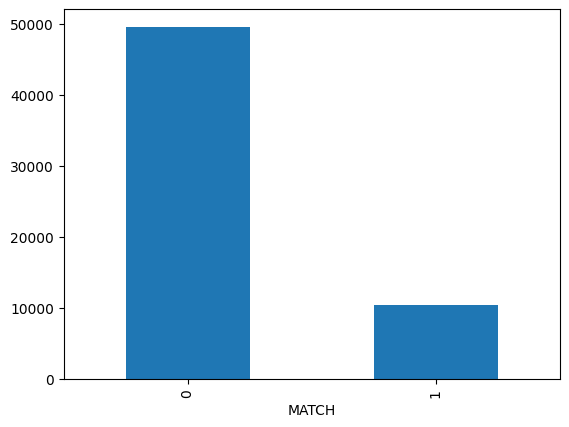

In [103]:
df_expected = df.groupby('MATCH')['VISIT DATE'].count().plot(kind='bar')

# need more data cleaning so that all actual matches are showing correctly

In [106]:
df['EXPECTED  DRUG'].unique()

array(['Ketamine', 'Cocaine', 'MDMA', 'Oxycodone', 'LSD', 'MDA', 'Heroin',
       'Methamphetamine', 'Down (Unknown Opioid)', 'Amphetamine',
       'Unknown', '5-MeO-MiPT', 'Hydromorphone', 'Bromazolam', 'DMT',
       'Fentanyl', 'Alprazolam', 'Tadalafil', 'GW501516', 'GHB',
       'Mescaline', 'Crack Cocaine', 'Metonitazene', 'Enobosarm',
       'Doxycycline', 'Flualprazolam', 'DPT',
       'Acetaminophen and Oxycodone', 'Etizolam', '2C-B', '4-HO-MiPT',
       'Modafinil', '3-MMC', 'Opium', 'GBL', 'Testosterone Isocaproate',
       'Sildenafil', 'Testosterone Enanthate', 'Clonazepam', 'MXE',
       'Diazepam', 'Oxandrolone', 'Tucibi', 'Desalkylgidazepam',
       '4-AcO-DMT', 'Ivermectin', 'Isotretinoin', 'Phenacetin',
       'Sildenafil and Tadalafil', 'Quetiapine', 'Fentanyl and Heroin',
       'Carfentanil', '2C-E', 'Tramadol', '2C-I', '4-MMC',
       '1,4-Butanediol', 'Lorazepam', 'Carisoprodol', 'Deschloroetizolam',
       '5-MeO-MALT', '4-HO-MET', 'FXE', 'Caffeine',
       'Methe